In [ ]:
# import required libraries for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL as Image
import os

#Ensure plots display in colab
%matplotlib inline

#set seaborn style for clean visualizations
sns.set(style='whitegrid')

import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)

In [ ]:
train_df = pd.read_csv('/content/train1.xray.csv')
train_df.head(1)
print(train_df.shape)

(107374, 21)


In [ ]:
print('dataset info:')
print(train_df.info())

dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107374 entries, 0 to 107373
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Image_name                  107374 non-null  object 
 1   Patient_ID                  107374 non-null  int64  
 2   Study                       107374 non-null  int64  
 3   Sex                         92608 non-null   object 
 4   Age                         92608 non-null   float64
 5   ViewCategory                107374 non-null  object 
 6   ViewPosition                107374 non-null  object 
 7   Atelectasis                 107374 non-null  int64  
 8   Cardiomegaly                107374 non-null  int64  
 9   Consolidation               107374 non-null  int64  
 10  Edema                       107374 non-null  int64  
 11  Enlarged Cardiomediastinum  107374 non-null  int64  
 12  Fracture                    107374 non-null  int64  
 13  

In [ ]:
#summarize key metrics
total_image= len(train_df)
total_patients = train_df['Patient_ID'].nunique()
total_study = train_df['Study'].nunique()

print(f'TOTAL IMAGES:{total_image}')
print(f'TOTAL PATIENTS:{total_patients}')
print(f'TOTAL STUDIES:{total_study}')

TOTAL IMAGES:107374
TOTAL PATIENTS:32076
TOTAL STUDIES:157


In [ ]:
#check for missing values
print('MISSING VALUES:')
print(train_df.isnull().sum())

MISSING VALUES:
Image_name                        0
Patient_ID                        0
Study                             0
Sex                           14766
Age                           14766
ViewCategory                      0
ViewPosition                      0
Atelectasis                       0
Cardiomegaly                      0
Consolidation                     0
Edema                             0
Enlarged Cardiomediastinum        0
Fracture                          0
Lung Lesion                       0
Lung Opacity                      0
No Finding                        0
Pleural Effusion                  0
Pleural Other                     0
Pneumonia                         0
Pneumothorax                      0
Support Devices                   0
dtype: int64


**LABEL PREVALANCE ANALYSIS**

In [ ]:
# Defien 14 conditions columns
label_columns = ['No Finding','Lung Opacity','Support Devices','Atelectasis','Cardiomegaly','Edema','Enlarged Cardiomediastinum',
                         'Fracture','Lung Lesion','Pleural Effusion','Pleural Other','Pneumonia','Pneumothorax']

labels_count = train_df[label_columns].sum()
label_percentages = ((labels_count/total_image)*100).round(2)

prevalance_df= pd.DataFrame(
    {
        'Conditions': labels_count.index,
        'Counts': labels_count.values,
        'percent(%)':label_percentages.values
    }
)

print('Prevalence Data:')
print(prevalance_df)

Prevalence Data:
                    Conditions  Counts  percent(%)
0                   No Finding   33957       31.62
1                 Lung Opacity   48626       45.29
2              Support Devices   37661       35.07
3                  Atelectasis   38834       36.17
4                 Cardiomegaly   35000       32.60
5                        Edema   26671       24.84
6   Enlarged Cardiomediastinum   37856       35.26
7                     Fracture   14984       13.95
8                  Lung Lesion   11899       11.08
9             Pleural Effusion   34242       31.89
10               Pleural Other    7061        6.58
11                   Pneumonia   14379       13.39
12                Pneumothorax    8814        8.21


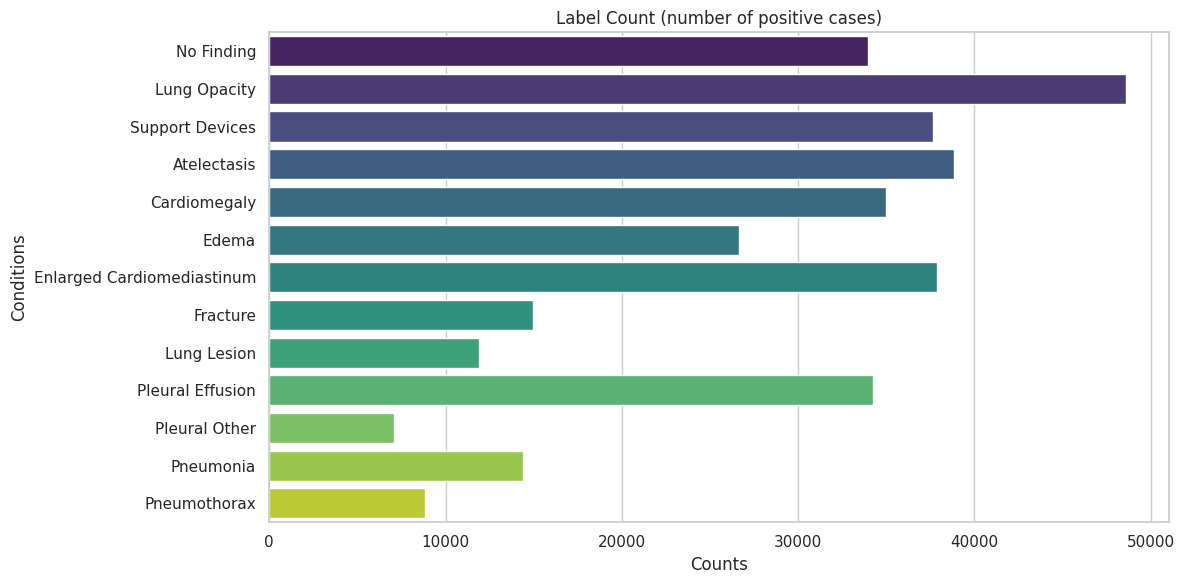

In [ ]:
from types import FrameType
plt.figure(figsize=(12,6))
sns.barplot(x='Counts', y= 'Conditions', data= prevalance_df, palette='viridis' , hue= None)
plt.title('Label Count (number of positive cases)')
plt.xlabel('Counts')
plt.ylabel('Conditions')
plt.legend([],[], frameon= False)
plt.tight_layout()
plt.savefig('/content/label_counts_barplot.jpg')
plt.show()

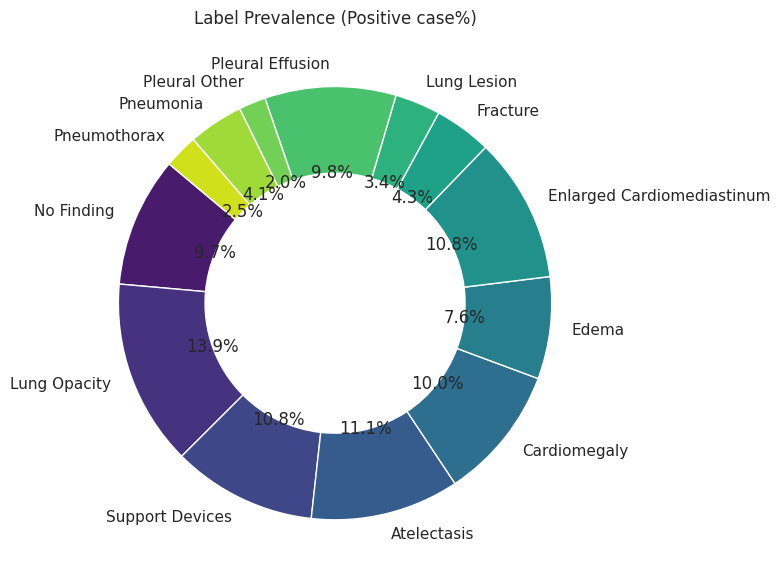

In [ ]:
# Donut chart for label percentages
plt.figure(figsize=(12,6))
colors = sns.color_palette('viridis',len(prevalance_df))
plt.pie(prevalance_df['Counts'],labels = prevalance_df['Conditions'],
        autopct=lambda pct :f'{pct:.1f}%',startangle=140, colors=colors,
        wedgeprops={'width':.4})
plt.title('Label Prevalence (Positive case%)')
plt.tight_layout()
plt.savefig('/content/label_percent_donut.jpg')
plt.show()

Multi Label Patterns

In [ ]:
train_df['Label_count'] = train_df[label_columns].sum(axis=1)
multilabel_count = train_df['Label_count'].value_counts().sort_index()
multilabel_percentage = (multilabel_count/ total_image *100).round(2)

print('Multi-Label Distribution')
multi_label_distribution = pd.DataFrame(
    {

        'number of labels': multilabel_count.index,
        'count': multilabel_count.values,
        'percentage': multilabel_percentage.values
    }
)
print(multi_label_distribution)

Multi-Label Distribution
    number of labels  count  percentage
0                  0    450        0.42
1                  1  52041       48.47
2                  2   8591        8.00
3                  3   5718        5.33
4                  4   5007        4.66
5                  5   5052        4.71
6                  6   7543        7.02
7                  7  14827       13.81
8                  8   4856        4.52
9                  9   2547        2.37
10                10    663        0.62
11                11     77        0.07
12                12      2        0.00


In [ ]:
co_occurance= train_df[label_columns].T.dot(train_df[label_columns])

print('co_occurance 5x5 table')
print(co_occurance.iloc[:5, :5])

co_occurance 5x5 table
                 No Finding  Lung Opacity  Support Devices  Atelectasis  \
No Finding            33957             0                0            0   
Lung Opacity              0         48626            29088        33578   
Support Devices           0         29088            37661        24769   
Atelectasis               0         33578            24769        38834   
Cardiomegaly              0         30413            25002        25609   

                 Cardiomegaly  
No Finding                  0  
Lung Opacity            30413  
Support Devices         25002  
Atelectasis             25609  
Cardiomegaly            35000  


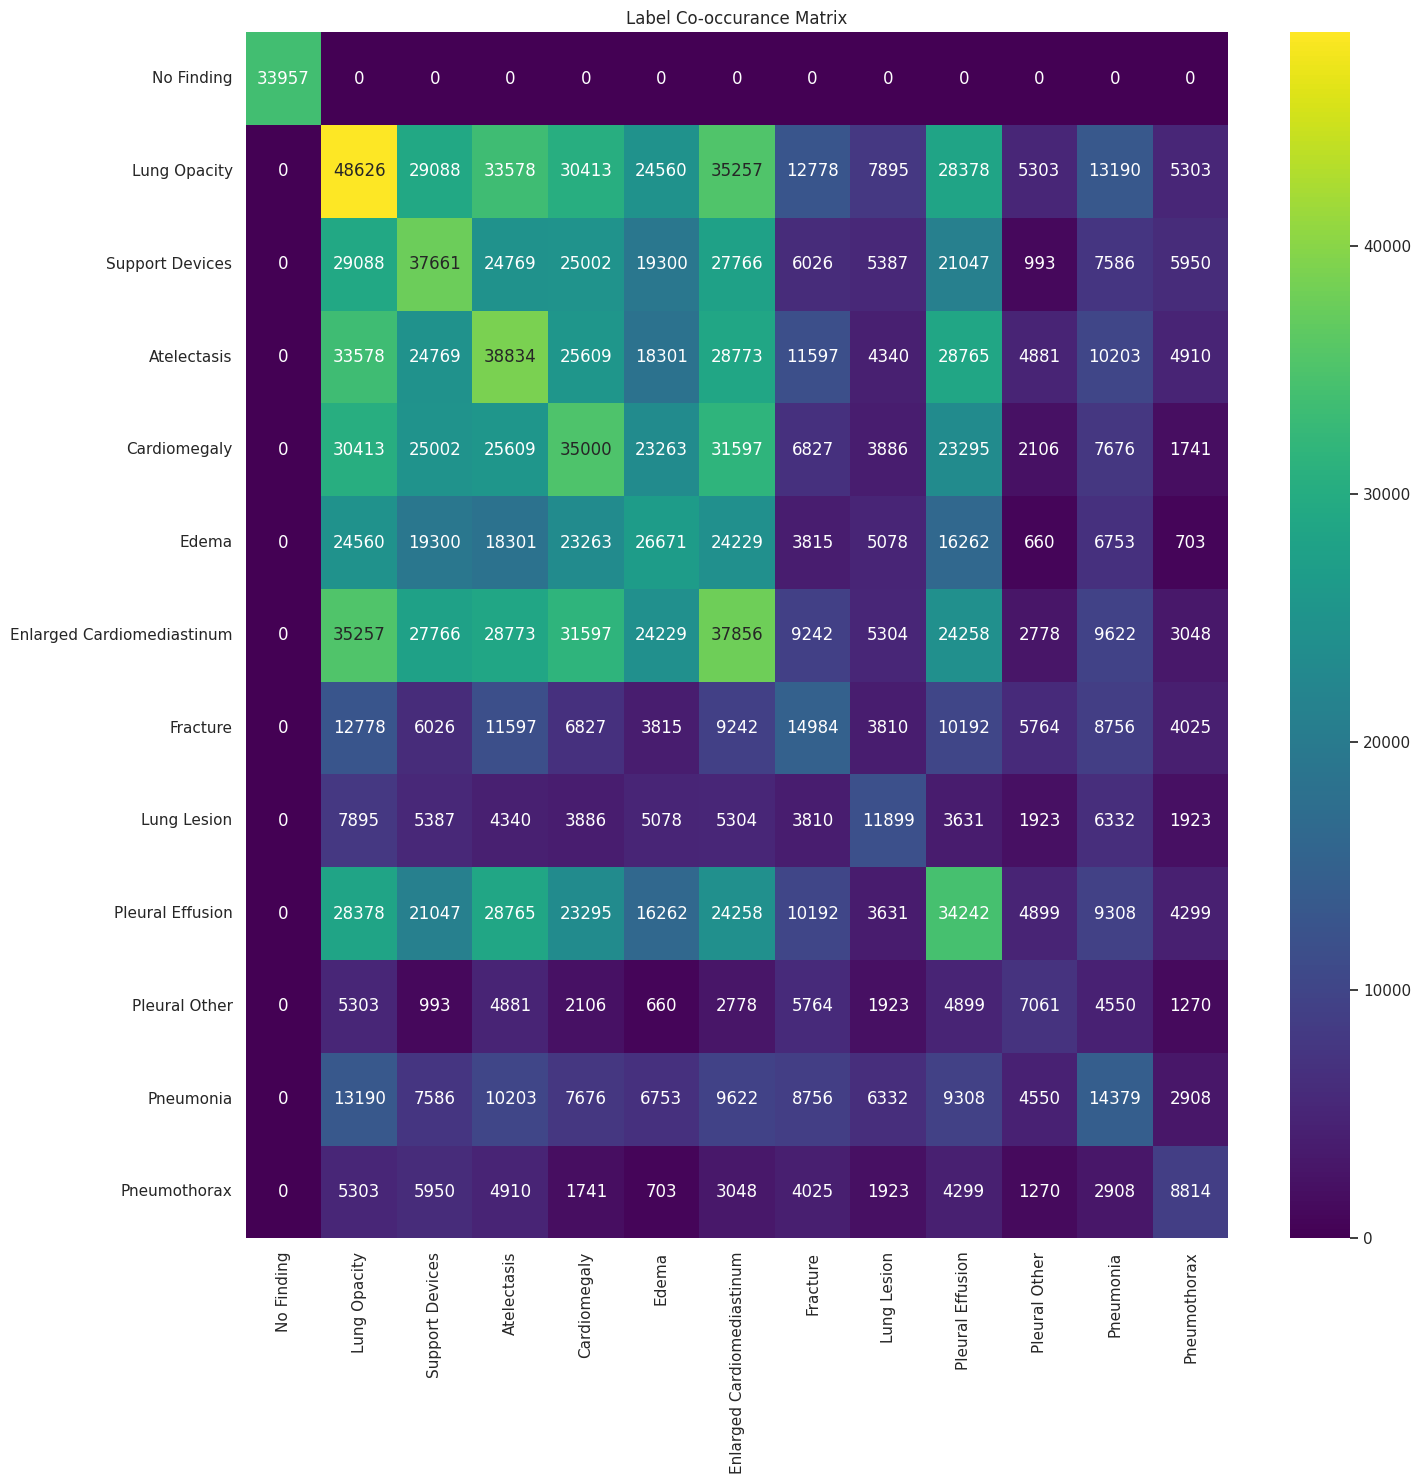

In [ ]:
# heat map for co-occurance
plt.figure(figsize=(15,15))
sns.heatmap( co_occurance, annot= True, fmt='d', cmap = 'viridis')
plt.title('Label Co-occurance Matrix')
plt.tight_layout()
plt.show()

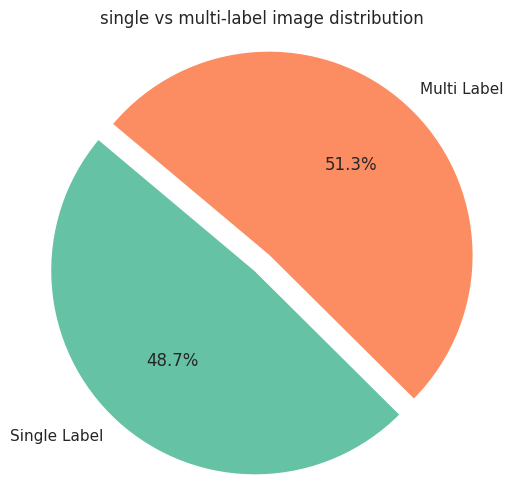

In [ ]:
# Visualizing Single-Label vs Multi-Label Image Distribution in Training Data
single_label_count = (train_df['Label_count']==1).sum()
multi_label_count=( train_df['Label_count']>1).sum()

label = ['Single Label', 'Multi Label']
sizes = [single_label_count, multi_label_count]
colors = ['#66c2a5', '#fc8d62']
explode = (0.05,0.05)

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=label, autopct='%1.1f%%', startangle =140, colors = colors, explode=explode)
plt.title('single vs multi-label image distribution')
plt.axis('equal')
plt.show()

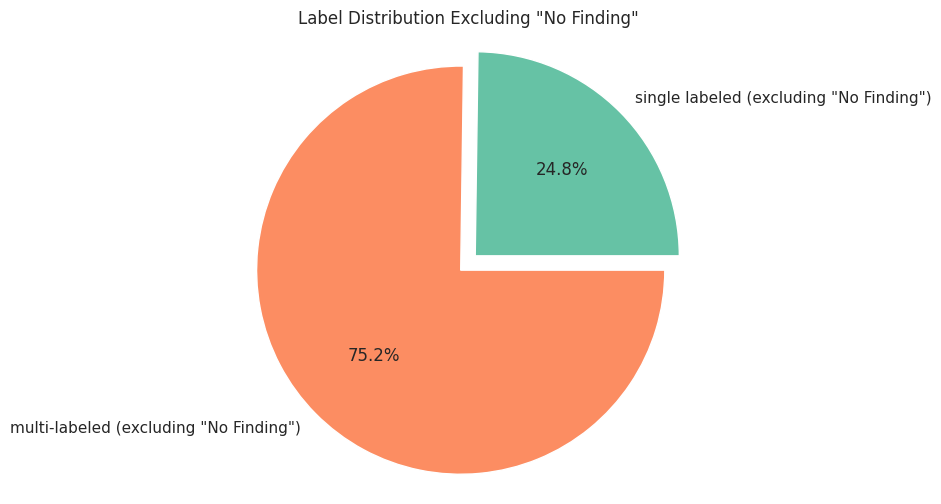

In [ ]:
# visualizing distribution excluding 'No Finding'
filtered_df = train_df[(train_df['Label_count']>=1)& train_df['No Finding']==0]


single_label_count = (filtered_df['Label_count']==1).sum()
multi_label_count= (filtered_df['Label_count']>1).sum()

label = ['single labeled (excluding "No Finding")', 'multi-labeled (excluding "No Finding")']
sizes = [single_label_count, multi_label_count]
colors = ['#66c2a5', '#fc8d62']
explode = (0.05,0.05)

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=label, autopct='%1.1f%%', colors= colors, explode=explode)
plt.title('Label Distribution Excluding "No Finding"')
plt.axis('equal')
plt.show()

DEMOGRAPHIC INSIGHTS

In [ ]:
# replace Nans with string 'Unknown' for plotting
sex_for_plot = train_df['Sex'].fillna('unknown')

# Get sex count including replaced Nans
sex_count= sex_for_plot.value_counts()

print("Sex distribution including 'unknown':")
print(sex_count)

Sex distribution including 'unknown':
Sex
Male       53692
Female     38916
unknown    14766
Name: count, dtype: int64


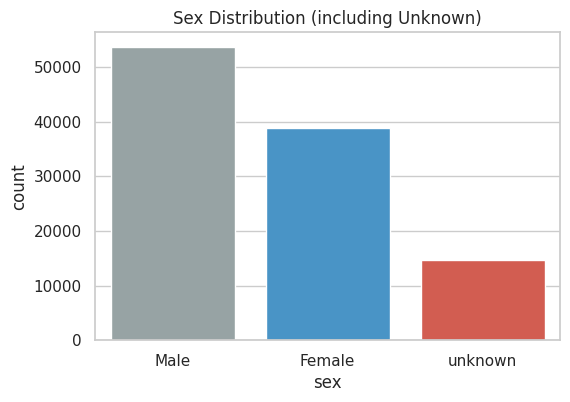

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x= sex_for_plot, order= sex_count.index, palette=['#95a5a6', '#3498db', '#e74c3c'])
plt.title('Sex Distribution (including Unknown)')
plt.xlabel('sex')
plt.ylabel('count')
plt.show()

In [ ]:
#age distribution
valid_age_min = 0
valid_age_max = 120
age = train_df['Age']
valid_age = age.dropna()
valid_age_count = valid_age[(valid_age>= valid_age_min)&(valid_age<= valid_age_max)].count()

nan_ages_count = age.isna().count()
invalid_age_count= valid_age[(valid_age< valid_age_min) | (valid_age> valid_age_max)].count()


print(f"Images with valid numeric Age: {valid_age_count}")
print(f"Images with missing Age (NaN): {nan_ages_count}")
print(f"Images with invalid Age (<{valid_age_min} or >{valid_age_max}): {invalid_age_count}")

Images with valid numeric Age: 92608
Images with missing Age (NaN): 107374
Images with invalid Age (<0 or >120): 0


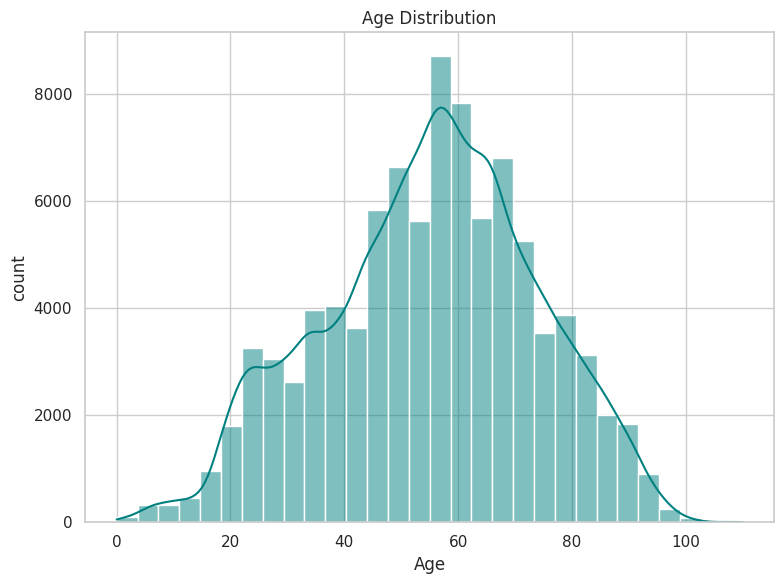

In [ ]:
# Histogram for age distribution
plt.figure(figsize=(8,6))
sns.histplot(train_df['Age'].dropna(),bins= 30, color='teal',kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.tight_layout()
plt.show()

<Figure size 1800x1200 with 0 Axes>

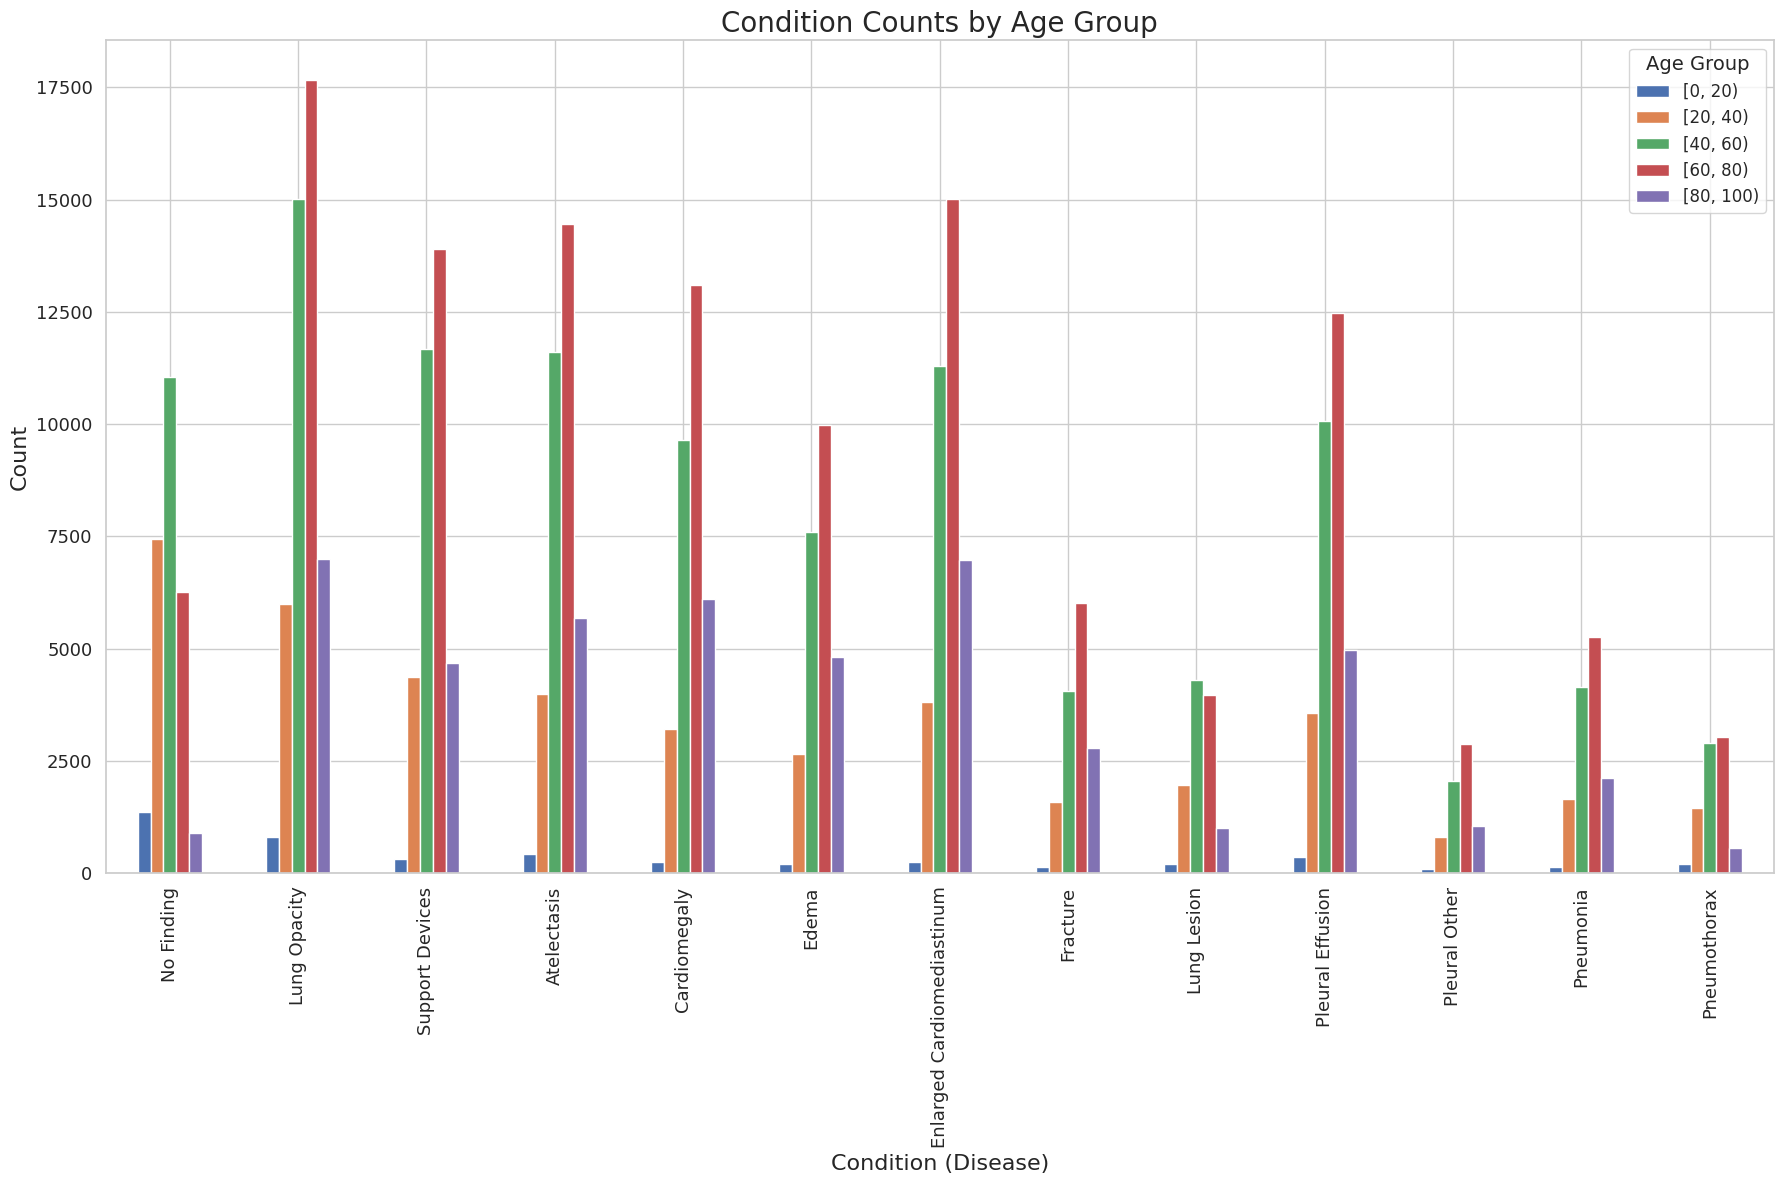

In [ ]:
# Condition prevelance by age group
age_bins= [0,20,40,60,80,100]
train_df['Agegroup']= pd.cut(train_df['Age'], bins=age_bins, right= False)

age_group_count= train_df.groupby('Agegroup')[label_columns].apply(lambda x:(x==1).sum())

plt.figure(figsize=(18,12))
ax= age_group_count.T.plot(kind= 'bar', stacked = False, figsize=(18,12))

plt.title('Condition Counts by Age Group', fontsize=20)
plt.xlabel('Condition (Disease)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(title='Age Group', fontsize=12, title_fontsize=14, loc='upper right')
plt.tight_layout()
plt.show()

Image view Breakdown

In [ ]:
# image view breakdown

# Count view categories and positions

view_cat_counts= train_df['ViewCategory'].value_counts(dropna=False)
view_pos_counts= train_df['ViewPosition'].value_counts(dropna=False)

print('ViewCategory Counts:')
print(view_cat_counts)


print('ViewPosition Counts:')
print(view_pos_counts)

ViewCategory Counts:
ViewCategory
Frontal    93551
Lateral    13823
Name: count, dtype: int64
ViewPosition Counts:
ViewPosition
AP         60660
PA         32887
Lateral    12315
LL          1512
Name: count, dtype: int64


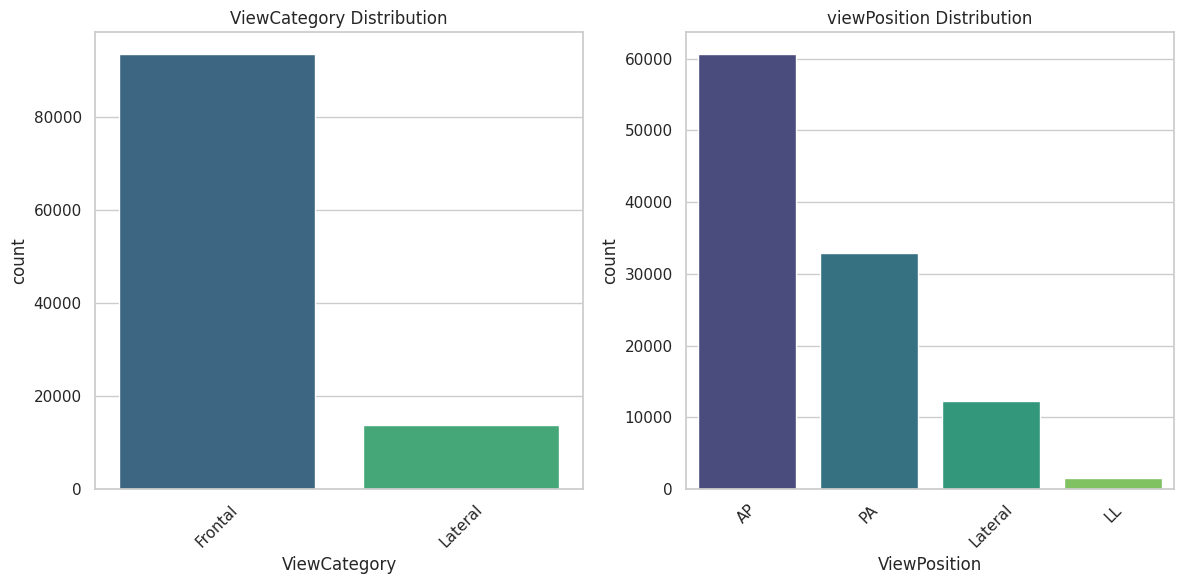

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x='ViewCategory', data= train_df, order = view_cat_counts.index, hue='ViewCategory', palette='viridis')
plt.title('ViewCategory Distribution')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x='ViewPosition', data= train_df , order = view_pos_counts.index, hue='ViewPosition', palette='viridis')
plt.title('viewPosition Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()